In [2]:
import sys
import os
from deepface import DeepFace
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
print(sys.version)
print(np.__version__)
print(tf.__version__)

ModuleNotFoundError: No module named 'deepface'

Extracting faces...
100.000%

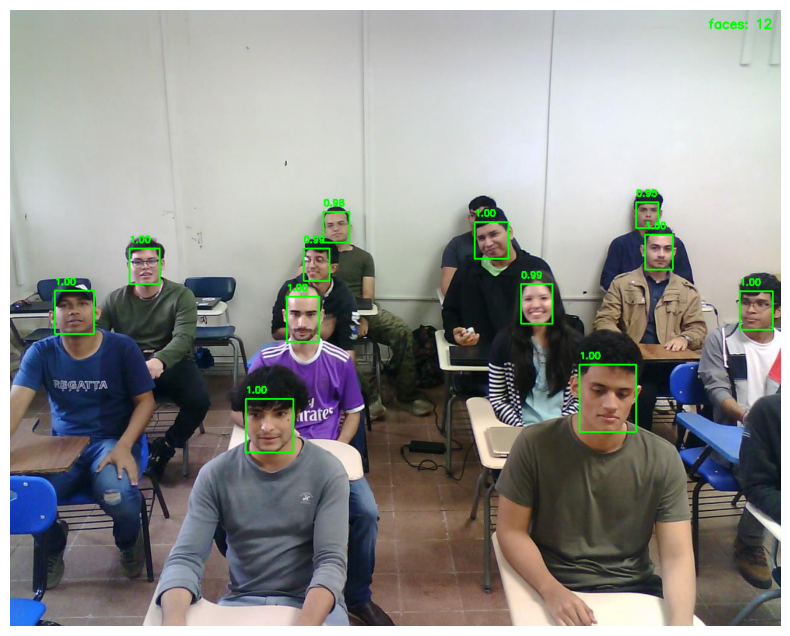

In [4]:
#seleccionar una sola imagen para el procesamiento
img_path = "./data/classroom/rawdata/s2/recording_2024-11-13_10-45-09/frame-224.jpg" 

# Cargar la imagen
image = cv2.imread(img_path)

# Detectar rostros con retinaface
print("Extracting faces...")
faces = DeepFace.extract_faces(
    img_path=image,
    detector_backend='retinaface',
    enforce_detection=True
)

# margen
margin_ratio = 0  # Margen adicional para el área de recorte


max_faces:int = len(faces)
face_count = 0

for face_data in faces:
    facial_area = face_data['facial_area']
    confidence = face_data.get('confidence', 0)

    loading = str.format("{0:.3f}", ((face_count+0.0)/(0.0+max_faces-1.0))*100.0)
    print("\r" + loading + "%", end="")
    
    # Obtener las coordenadas del bounding box
    x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']

        # Calcular margen adicional
    margin_x = int(w * margin_ratio)
    margin_y = int(h * margin_ratio)
    
    # Ajustar coordenadas al tamaño original y agregar margen
    x = int(x * scale_factor) - margin_x
    y = int(y * scale_factor) - margin_y
    w = int(w * scale_factor) + 2 * margin_x
    h = int(h * scale_factor) + 2 * margin_y

    # Dibujar el rectángulo
    color = (0, 255, 0)  # Verde
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    
    # Añadir el valor de confianza arriba del cuadro
    label = f"{confidence:.2f}"
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Contador de rostros
    face_count += 1

# Mostrar el número de rostros detectados en la esquina superior derecha
cv2.putText(image, f"faces: {face_count}", (image.shape[1] - 120, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Convertir imagen de BGR a RGB para mostrarla con matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
